In [1]:
import pandas as pd
import chardet
import collections
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 800)

In [2]:
with open('premier_league_data_consolidated.tsv', 'rb') as f:
    result = chardet.detect(f.read()) 

In [3]:
df_original=pd.read_csv('premier_league_data_consolidated.tsv',delimiter='\t',encoding = result['encoding'])

In [4]:
df_completeset_converted = df_original

In [5]:
df_completeset_converted['tot_offside_a']=df_completeset_converted['tot_offside_a'].fillna(0)
df_completeset_converted['tot_offside_h']=df_completeset_converted['tot_offside_h'].fillna(0)
df_completeset_converted['shot_off_target_h']=df_completeset_converted['shot_off_target_h'].fillna(0)
df_completeset_converted['shot_off_target_a']=df_completeset_converted['shot_off_target_a'].fillna(0)
df_completeset_converted['corner_taken_h']=df_completeset_converted['corner_taken_h'].fillna(0)
df_completeset_converted['corner_taken_a']=df_completeset_converted['corner_taken_a'].fillna(0)
df_completeset_converted['interception_h']=df_completeset_converted['interception_h'].fillna(0)
df_completeset_converted['interception_a']=df_completeset_converted['interception_a'].fillna(0)
df_completeset_converted['first_half_goals_h']=df_completeset_converted['first_half_goals_h'].fillna(0)
df_completeset_converted['first_half_goals_a']=df_completeset_converted['first_half_goals_a'].fillna(0)
df_completeset_converted['goals_openplay_h']=df_completeset_converted['goals_openplay_h'].fillna(0)
df_completeset_converted['goals_openplay_a']=df_completeset_converted['goals_openplay_a'].fillna(0)
df_completeset_converted['big_chance_created_h']=df_completeset_converted['big_chance_created_h'].fillna(0)
df_completeset_converted['big_chance_created_a']=df_completeset_converted['big_chance_created_a'].fillna(0)
df_completeset_converted['big_chance_scored_h']=df_completeset_converted['big_chance_scored_h'].fillna(0)
df_completeset_converted['big_chance_scored_a']=df_completeset_converted['big_chance_scored_a'].fillna(0)
df_completeset_converted['big_chance_missed_h']=df_completeset_converted['big_chance_missed_h'].fillna(0)
df_completeset_converted['big_chance_missed_a']=df_completeset_converted['big_chance_missed_a'].fillna(0)
df_completeset_converted['own_goal_accrued_h']=df_completeset_converted['own_goal_accrued_h'].fillna(0)
df_completeset_converted['own_goal_accrued_a']=df_completeset_converted['own_goal_accrued_a'].fillna(0)
df_completeset_converted['saves_h']=df_completeset_converted['saves_h'].fillna(0)
df_completeset_converted['saves_a']=df_completeset_converted['saves_a'].fillna(0)
df_completeset_converted['tot_yel_card_h']=df_completeset_converted['tot_yel_card_h'].fillna(0)
df_completeset_converted['tot_yel_card_a']=df_completeset_converted['tot_yel_card_a'].fillna(0)
df_completeset_converted['forward_goals_h']=df_completeset_converted['forward_goals_h'].fillna(0)
df_completeset_converted['forward_goals_a']=df_completeset_converted['forward_goals_a'].fillna(0)
df_completeset_converted['defender_goals_h']=df_completeset_converted['defender_goals_h'].fillna(0)
df_completeset_converted['defender_goals_a']=df_completeset_converted['defender_goals_a'].fillna(0)
df_completeset_converted['midfielder_goals_h']=df_completeset_converted['midfielder_goals_h'].fillna(0)
df_completeset_converted['midfielder_goals_a']=df_completeset_converted['midfielder_goals_a'].fillna(0)
df_completeset_converted['subs_made_h']=df_completeset_converted['subs_made_h'].fillna(0)
df_completeset_converted['subs_made_a']=df_completeset_converted['subs_made_a'].fillna(0)

In [6]:
seasons=df_completeset_converted.seasonlabel.unique()
print (seasons)

['2015/16' '2016/17' '2017/18' '2018/19']


In [7]:
all_season_ranking = {}
season_ranking={}
standing_by_season_table={}

In [8]:
def mergeDict (dict1 , dict2):
    Cdict = collections.defaultdict(int)
    for key , val in itertools.chain (dict1.items(), dict2.items()):
        Cdict[key] += val
        return dict(Cdict)

In [9]:
def find_common (list1 , list2):
    return list(set(list(list1)+list(list2)))

In [10]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
for season in seasons:
    print(season)
    season_teams=[]
    season_ranking={}
    df_season = df_completeset_converted[df_completeset_converted['seasonlabel']==season]
    season_teams = find_common(df_season.team_h.unique(), df_season.team_a.unique())
    #season_teams = ['Manchester City']
    for season_team in season_teams:
        #print(season_team+'->')
        team_stat={}
        df_team = df_season[(df_season['team_h']==season_team) | (df_season['team_a']==season_team)]
        team_stat['win'] = df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='H')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')))].shape[0]
        team_stat['loss'] = df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='A')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='H')))].shape[0]
        team_stat['draw'] = df_team[df_team['matchoutcome']=='D'].shape[0]
        team_stat['GS'] =df_team.loc[(df_season['team_h']==season_team),'score_h'].sum()+df_team.loc[(df_season['team_a']==season_team),'score_a'].sum()
        team_stat['GA'] =df_team.loc[(df_season['team_h']==season_team),'score_a'].sum()+df_team.loc[(df_season['team_a']==season_team),'score_h'].sum()
        team_stat['Point'] = team_stat['win']*3 + team_stat['draw']*1
        team_stat['GoalDiff'] = team_stat['GS'] - team_stat['GA']
        season_ranking[season_team]=team_stat
    season_ranking2=sorted(season_ranking, key=lambda x: (season_ranking[x]['Point'],season_ranking[x]['GoalDiff']),reverse=True)
    print(season_ranking2)
    all_season_ranking[season]=season_ranking2
print(all_season_ranking)

2015/16
['Leicester City', 'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Southampton', 'West Ham United', 'Liverpool', 'Stoke City', 'Chelsea', 'Everton', 'Swansea City', 'Watford', 'West Bromwich Albion', 'Crystal Palace', 'AFC Bournemouth', 'Sunderland', 'Newcastle United', 'Norwich City', 'Aston Villa']
2016/17
['Chelsea', 'Tottenham Hotspur', 'Manchester City', 'Liverpool', 'Arsenal', 'Manchester United', 'Everton', 'Southampton', 'AFC Bournemouth', 'West Bromwich Albion', 'West Ham United', 'Stoke City', 'Leicester City', 'Crystal Palace', 'Swansea City', 'Burnley', 'Watford', 'Hull City', 'Middlesbrough', 'Sunderland']
2017/18
['Manchester City', 'Manchester United', 'Tottenham Hotspur', 'Liverpool', 'Chelsea', 'Arsenal', 'Burnley', 'Everton', 'Leicester City', 'Newcastle United', 'Crystal Palace', 'AFC Bournemouth', 'West Ham United', 'Watford', 'Brighton and Hove Albion', 'Huddersfield Town', 'Southampton', 'Swansea City', 'Stoke City', 'West Bromwich

In [44]:
df_seasons_table = pd.DataFrame(all_season_ranking)
df_seasons_table

,2015/16,2016/17,2017/18,2018/19
0,Leicester City,Chelsea,Manchester City,Manchester City
1,Arsenal,Tottenham Hotspur,Manchester United,Liverpool
2,Tottenham Hotspur,Manchester City,Tottenham Hotspur,Chelsea
3,Manchester City,Liverpool,Liverpool,Tottenham Hotspur
4,Manchester United,Arsenal,Chelsea,Arsenal
5,Southampton,Manchester United,Arsenal,Manchester United
6,West Ham United,Everton,Burnley,Wolverhampton Wanderers
7,Liverpool,Southampton,Everton,Everton
8,Stoke City,AFC Bournemouth,Leicester City,Leicester City
9,Chelsea,West Bromwich Albion,Newcastle United,West Ham United


In [12]:
df_team_summary_all_season = pd.DataFrame(columns=['team','seasonlabel','total_game','win','win_h','win_a','draw','draw_h','draw_a','loss','loss_h','loss_a'],index=range(80))

In [13]:
print (seasons)

i=0
for season in seasons:
    df_season = df_completeset_converted[df_completeset_converted['seasonlabel']==season]
    season_teams = find_common(df_season.team_h.unique(), df_season.team_a.unique())
    for season_team in season_teams:
        df_team = df_season[(df_season['team_h']==season_team) | (df_season['team_a']==season_team)]
        df_team_summary_all_season.loc[i].team = season_team
        df_team_summary_all_season.loc[i].seasonlabel=season
        df_team_summary_all_season.loc[i].total_game=df_season[(df_season['team_h']==season_team) | (df_season['team_a']==season_team)].shape[0]
        df_team_summary_all_season.loc[i].win=df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='H')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')))].shape[0]
        df_team_summary_all_season.loc[i].win_h=df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='H')))].shape[0]
        df_team_summary_all_season.loc[i].win_a = df_team[(((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')))].shape[0]
        df_team_summary_all_season.loc[i].draw=df_team[df_team['matchoutcome']=='D'].shape[0]
        df_team_summary_all_season.loc[i].draw_h=df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='D')))].shape[0]
        df_team_summary_all_season.loc[i].draw_a=df_team[(((df_team['team_a']==season_team) & (df_team['matchoutcome']=='D')))].shape[0]
        df_team_summary_all_season.loc[i].loss= df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='A')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='H')))].shape[0]
        df_team_summary_all_season.loc[i].loss_h= df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='A')) )].shape[0]
        df_team_summary_all_season.loc[i].loss_a= df_team[(((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')) )].shape[0]
        i=i+1
print(df_team_summary_all_season[df_team_summary_all_season['seasonlabel']=='2016/17'])

['2015/16' '2016/17' '2017/18' '2018/19']
                    team seasonlabel total_game win win_h win_a draw draw_h draw_a loss loss_h loss_a
20       West Ham United     2016/17         38  12     7     5    9      4      5   17      8      5
21               Burnley     2016/17         38  11    10     1    7      3      4   20      6      1
22         Middlesbrough     2016/17         38   5     4     1   13      6      7   20      9      1
23             Liverpool     2016/17         38  22    12    10   10      5      5    6      2     10
24     Manchester United     2016/17         38  18     8    10   15     10      5    5      1     10
25            Stoke City     2016/17         38  11     7     4   11      6      5   16      6      4
26               Arsenal     2016/17         38  23    14     9    6      3      3    9      2      9
27            Sunderland     2016/17         38   6     3     3    6      5      1   26     11      3
28             Hull City     2016/17    

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Analysis for season:2015/16
Team Name:Sunderland


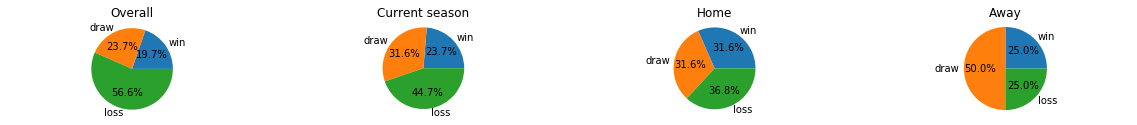

Team Name:West Ham United


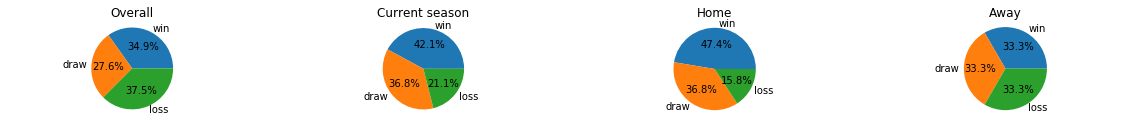

Team Name:Manchester United


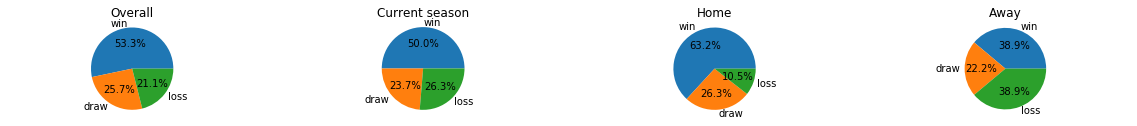

Team Name:Stoke City


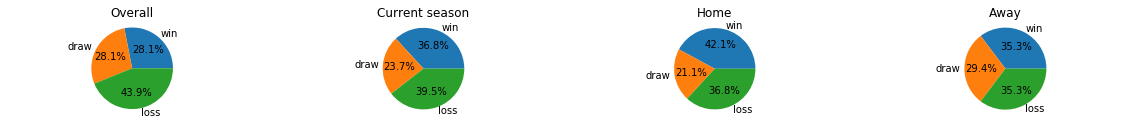

Team Name:Everton


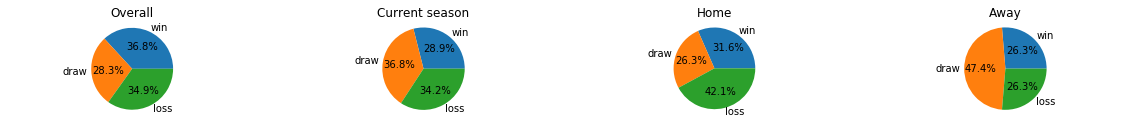

Team Name:Arsenal


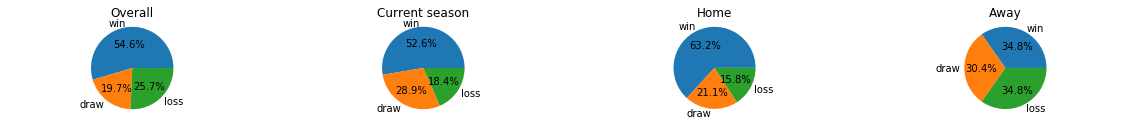

Team Name:Liverpool


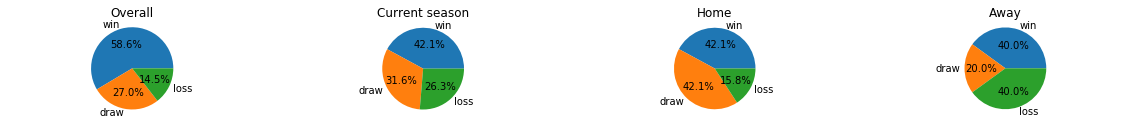

Team Name:Crystal Palace


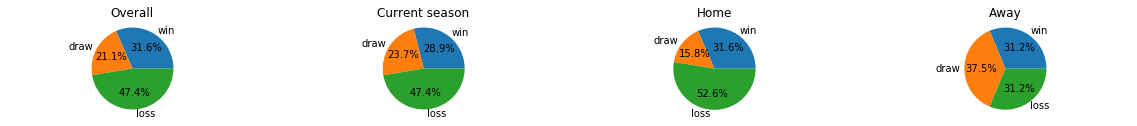

Team Name:Norwich City


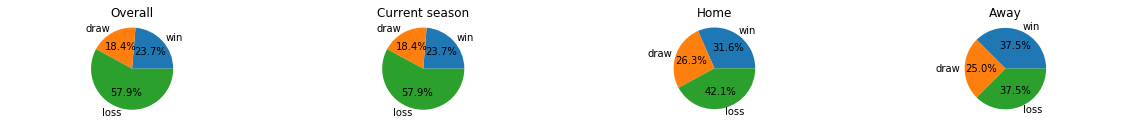

Team Name:Leicester City


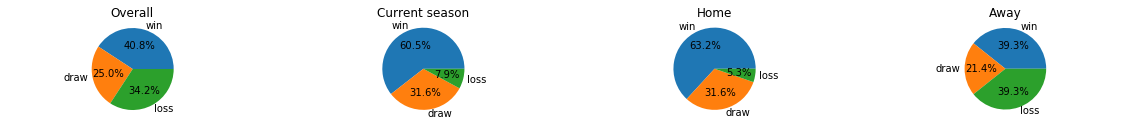

Team Name:Southampton


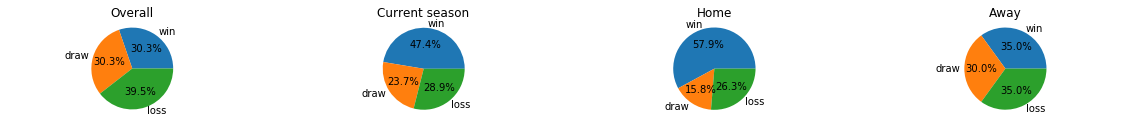

Team Name:Manchester City


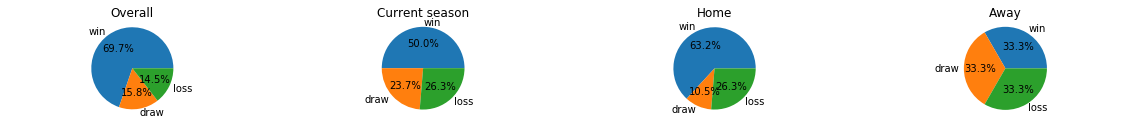

Team Name:Swansea City


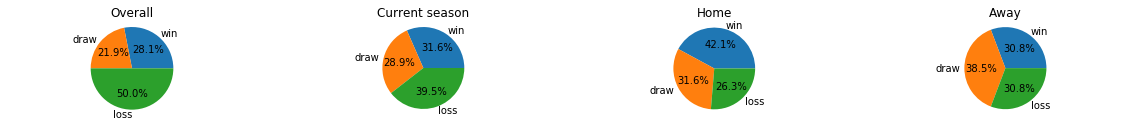

Team Name:Newcastle United


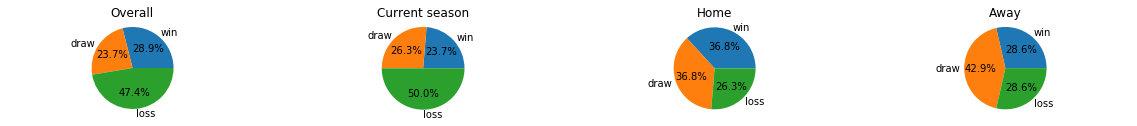

Team Name:Watford


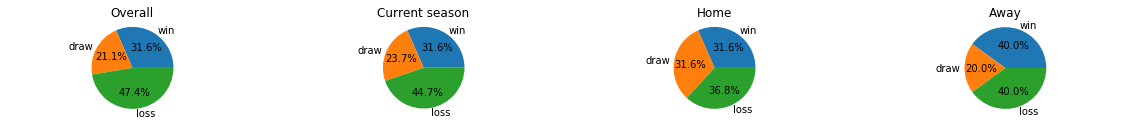

Team Name:Tottenham Hotspur


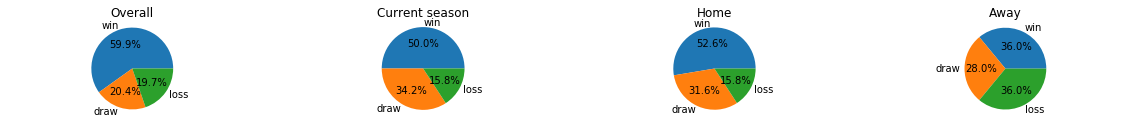

Team Name:Chelsea


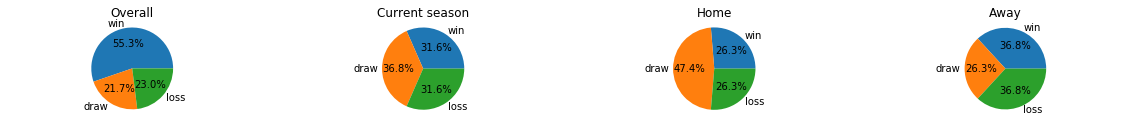

Team Name:Aston Villa


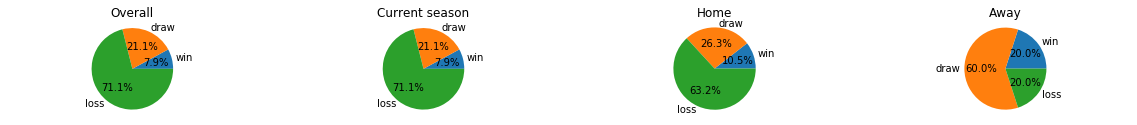

Team Name:AFC Bournemouth


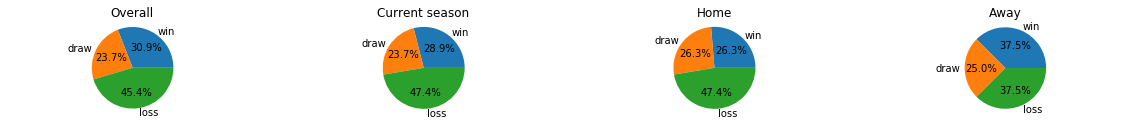

Team Name:West Bromwich Albion


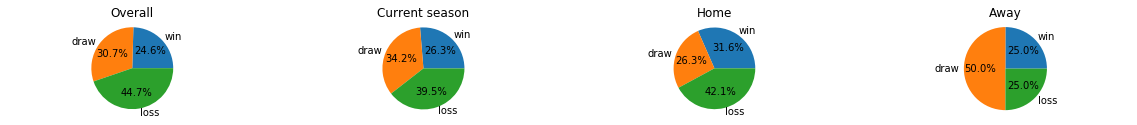

Analysis for season:2016/17
Team Name:West Ham United


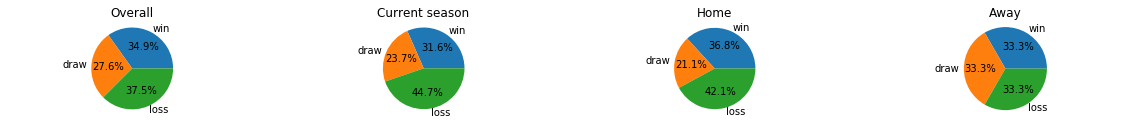

Team Name:Burnley


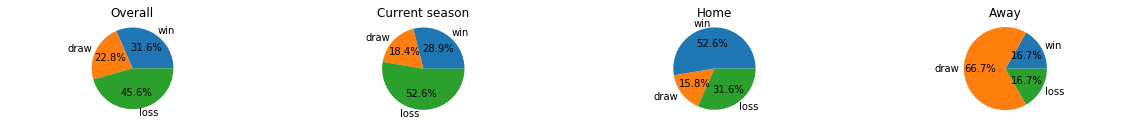

Team Name:Middlesbrough


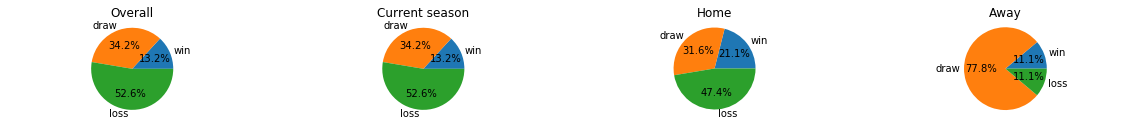

Team Name:Liverpool


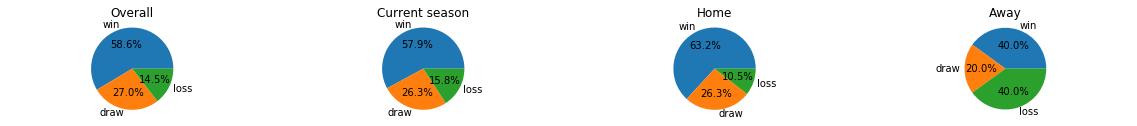

Team Name:Manchester United


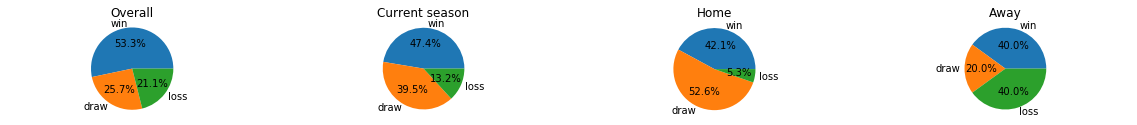

Team Name:Stoke City


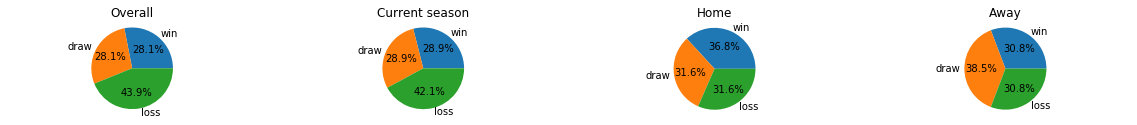

Team Name:Arsenal


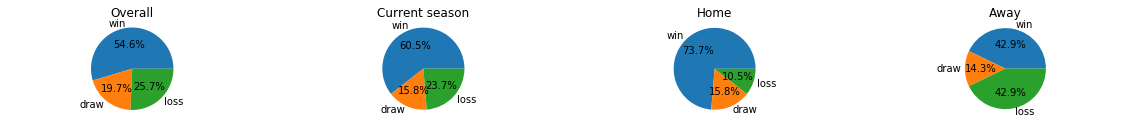

Team Name:Sunderland


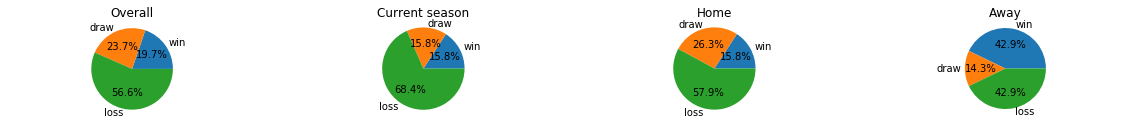

Team Name:Hull City


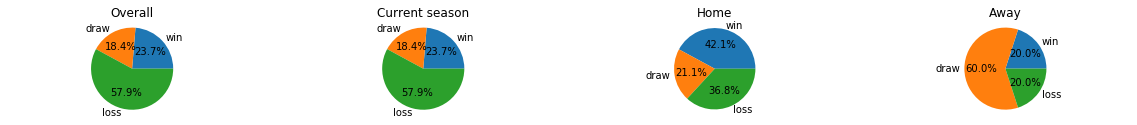

Team Name:Everton


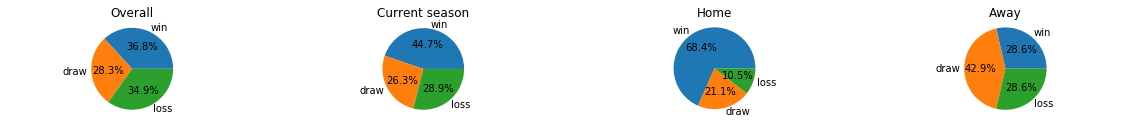

Team Name:Leicester City


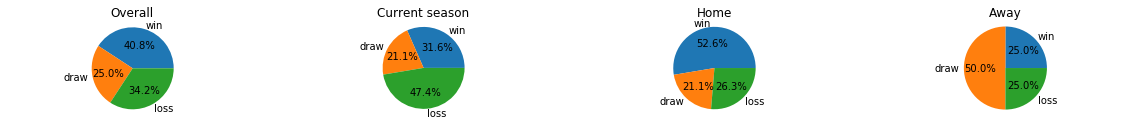

Team Name:Southampton


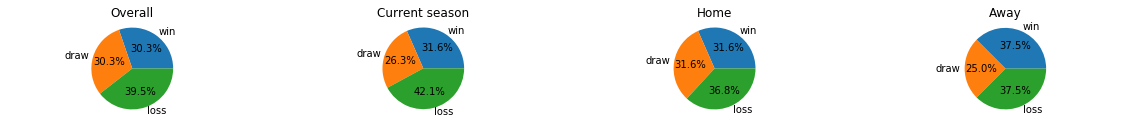

Team Name:Manchester City


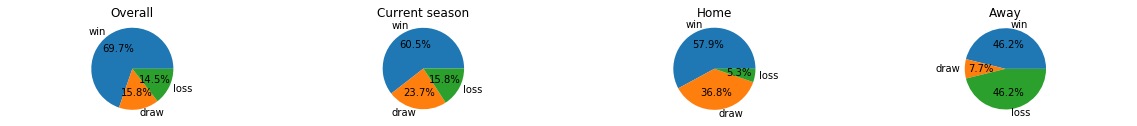

Team Name:Swansea City


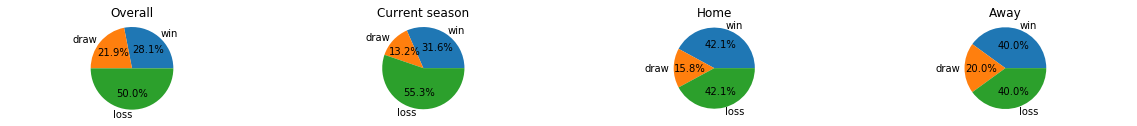

Team Name:Tottenham Hotspur


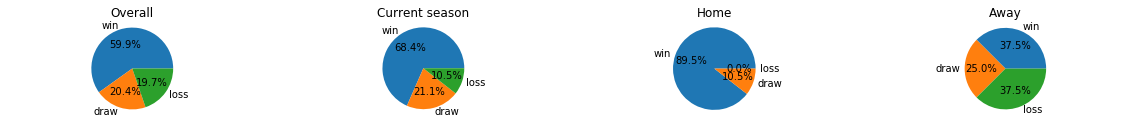

Team Name:Watford


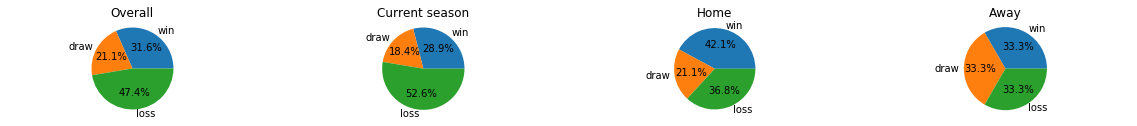

Team Name:Crystal Palace


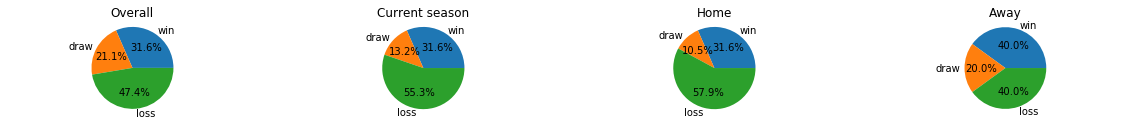

Team Name:Chelsea


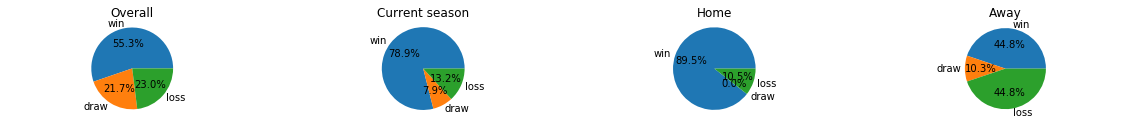

Team Name:AFC Bournemouth


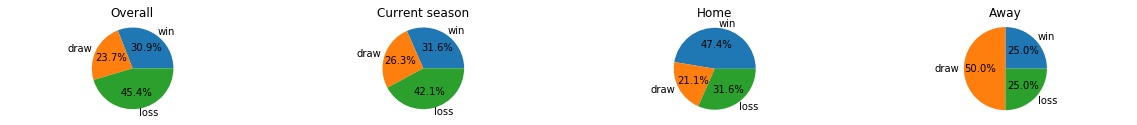

Team Name:West Bromwich Albion


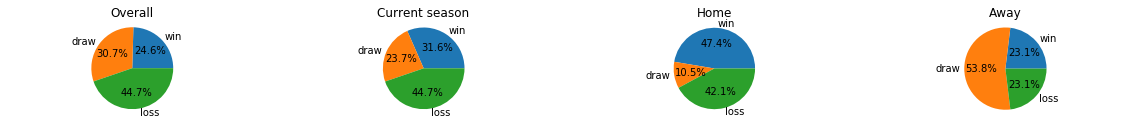

Analysis for season:2017/18
Team Name:West Ham United


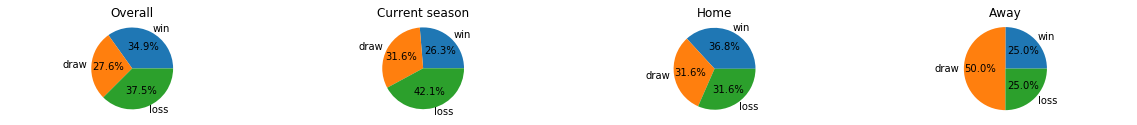

Team Name:Burnley


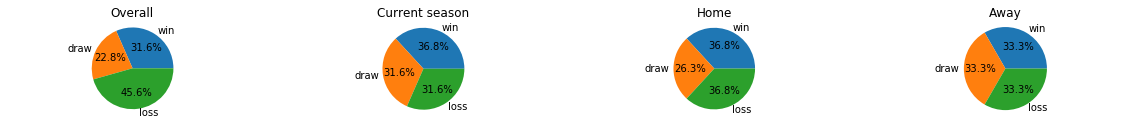

Team Name:Chelsea


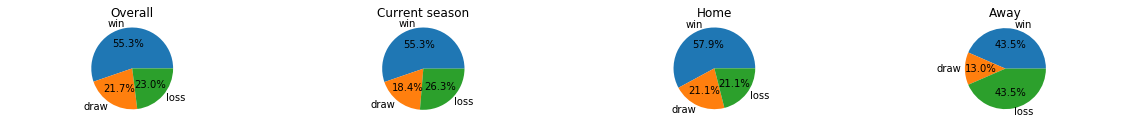

Team Name:Liverpool


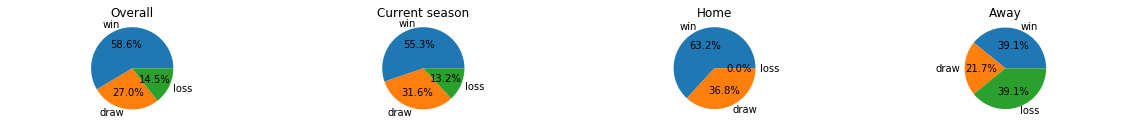

Team Name:Manchester United


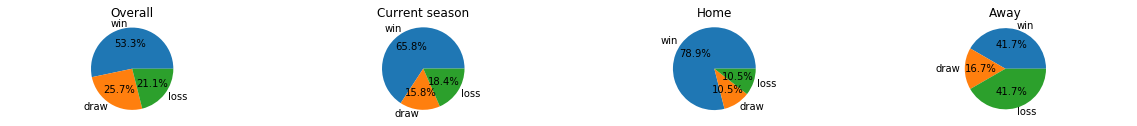

Team Name:Everton


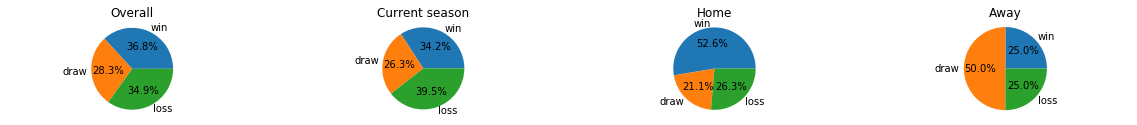

Team Name:Arsenal


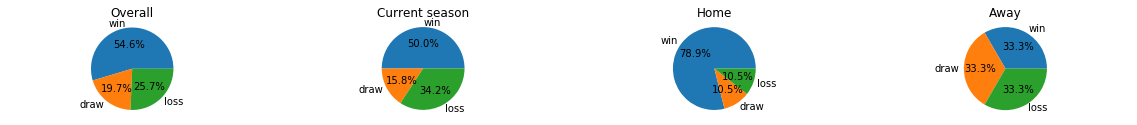

Team Name:Stoke City


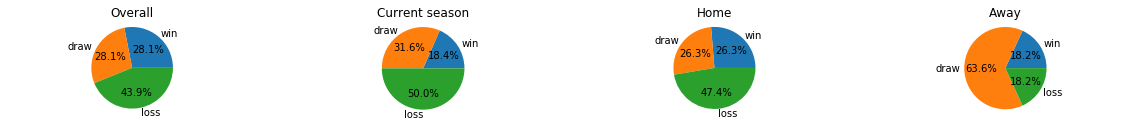

Team Name:Brighton and Hove Albion


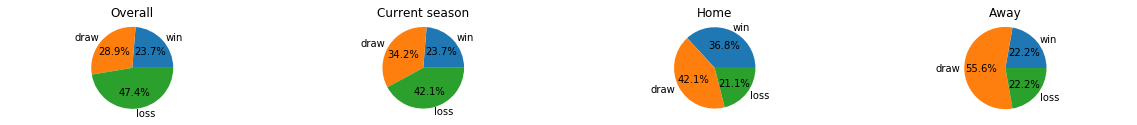

Team Name:Huddersfield Town


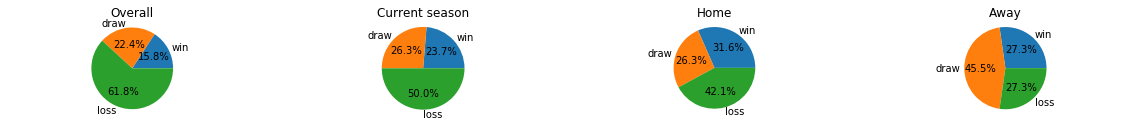

Team Name:Leicester City


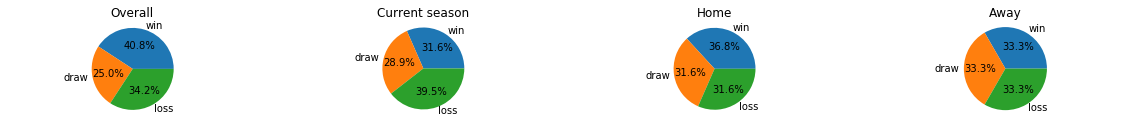

Team Name:Southampton


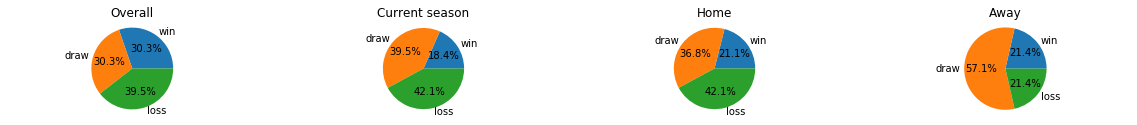

Team Name:Manchester City


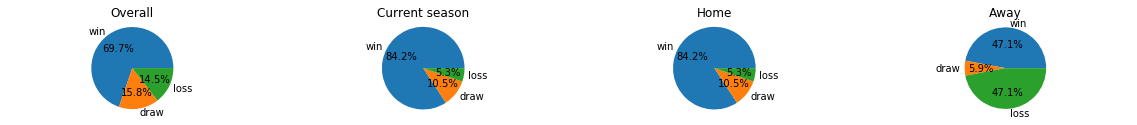

Team Name:Swansea City


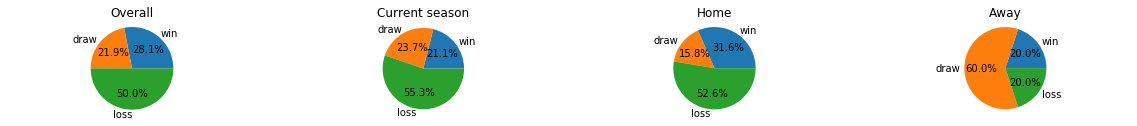

Team Name:Tottenham Hotspur


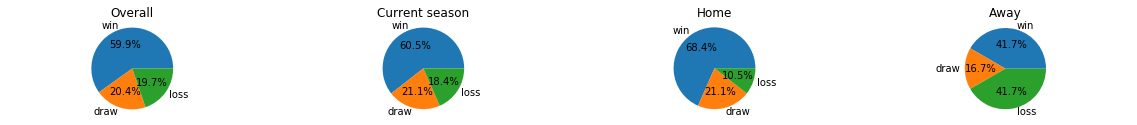

Team Name:AFC Bournemouth


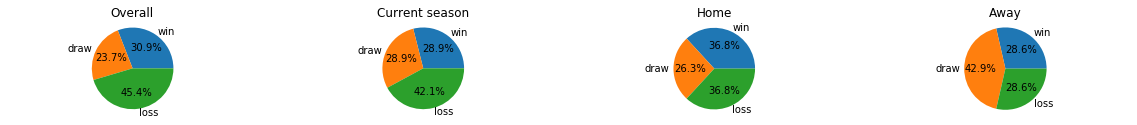

Team Name:Crystal Palace


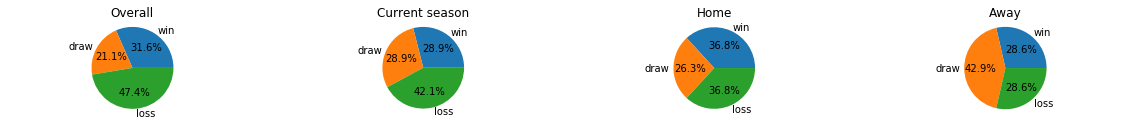

Team Name:Newcastle United


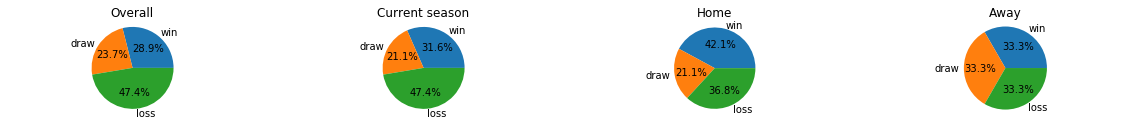

Team Name:Watford


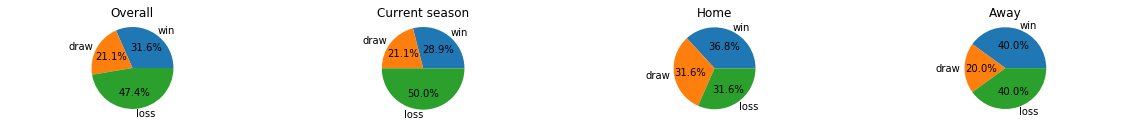

Team Name:West Bromwich Albion


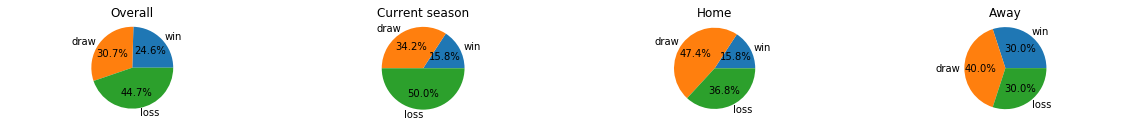

Analysis for season:2018/19
Team Name:West Ham United


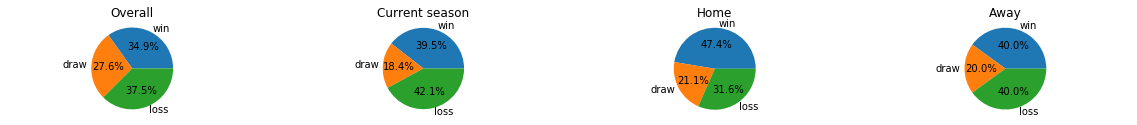

Team Name:Burnley


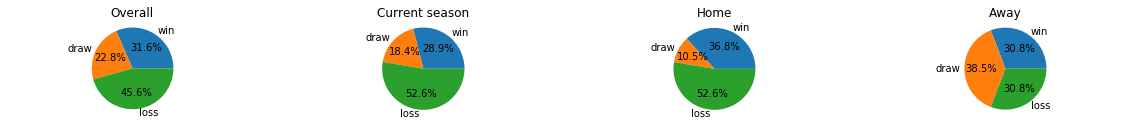

Team Name:Fulham


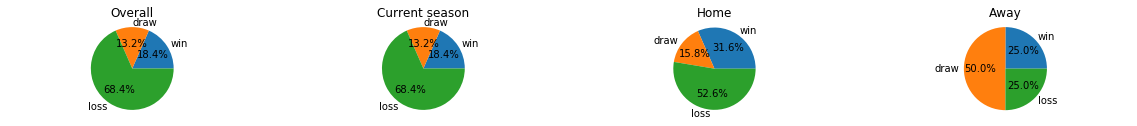

Team Name:Liverpool


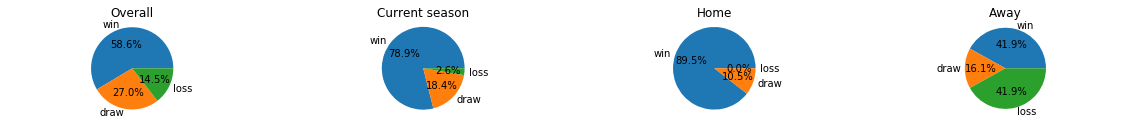

Team Name:Manchester United


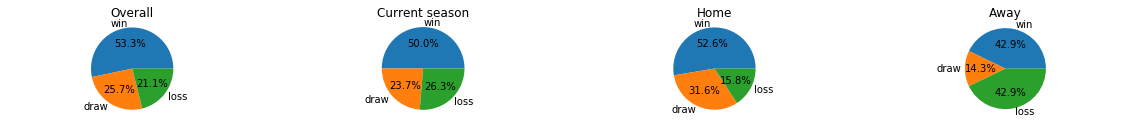

Team Name:Chelsea


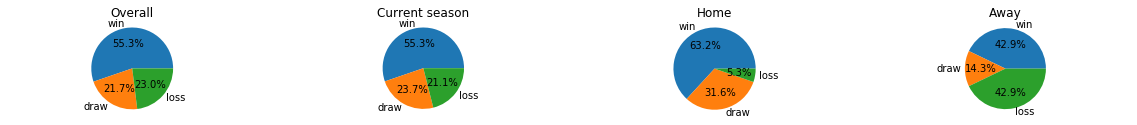

Team Name:Arsenal


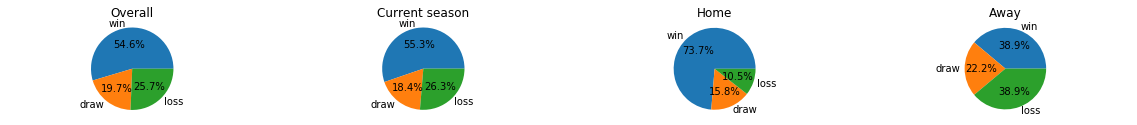

Team Name:Wolverhampton Wanderers


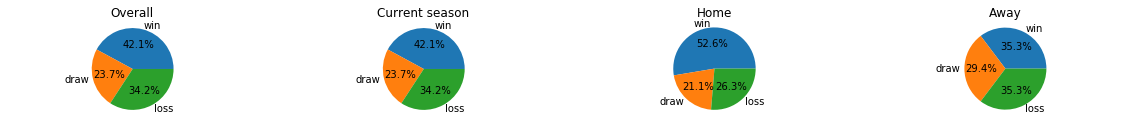

Team Name:Everton


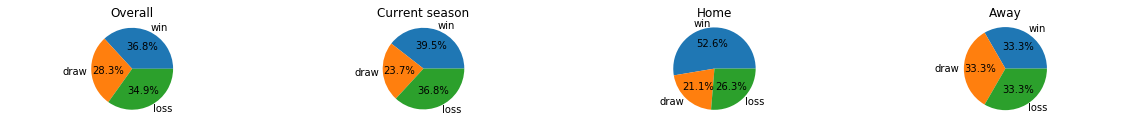

Team Name:Cardiff City


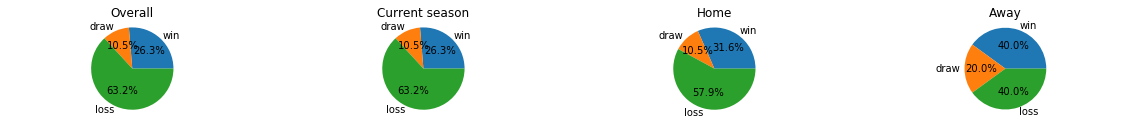

Team Name:Brighton and Hove Albion


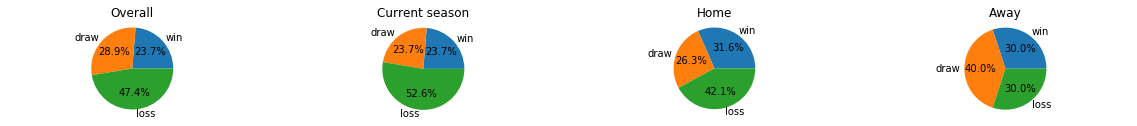

Team Name:Huddersfield Town


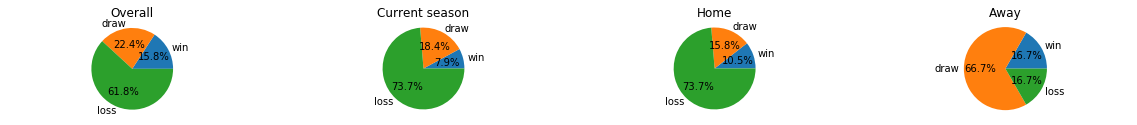

Team Name:Leicester City


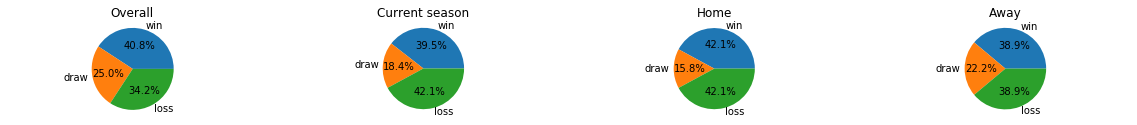

Team Name:Manchester City


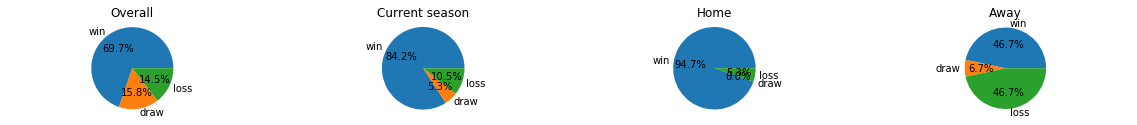

Team Name:Tottenham Hotspur


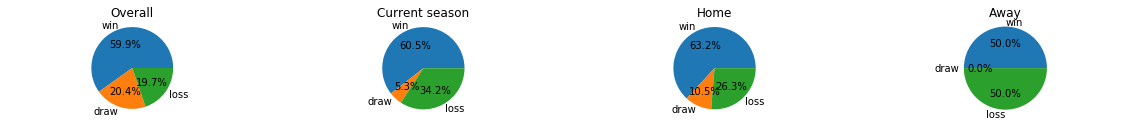

Team Name:Newcastle United


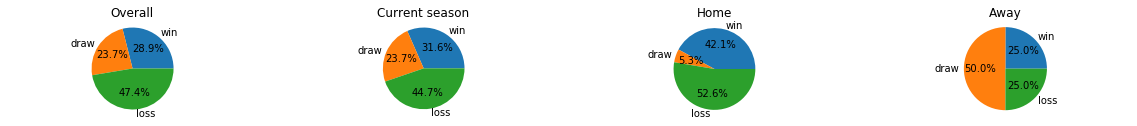

Team Name:Watford


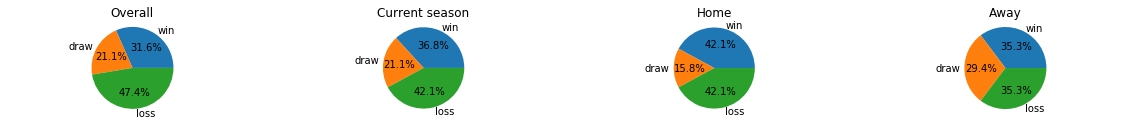

Team Name:Crystal Palace


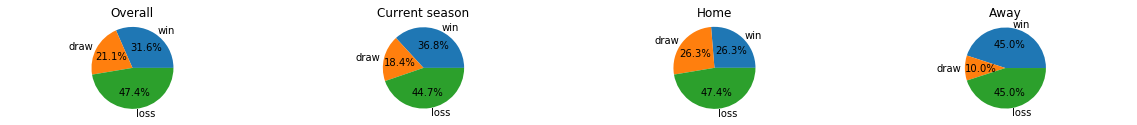

Team Name:Southampton


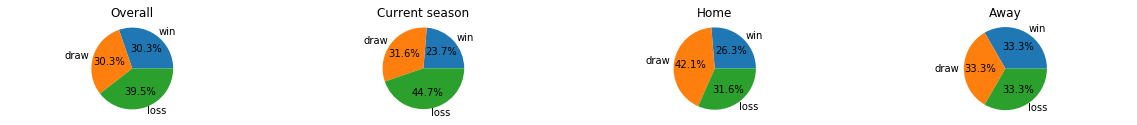

Team Name:AFC Bournemouth


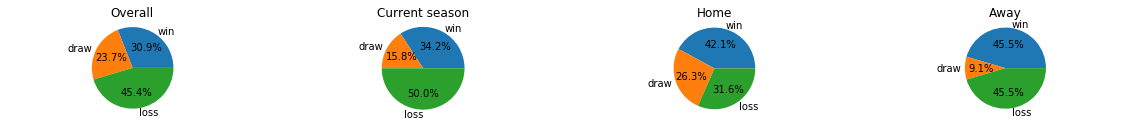

In [15]:

labels = 'win', 'draw', 'loss'
ch_title_win_loss = {0:"Overall",1:"Current season",2:"Home",3:"Away"}
for season in seasons:
    print ('Analysis for season:'+season)
    df_t1= df_team_summary_all_season[df_team_summary_all_season['seasonlabel']==season]
    rowidx = df_t1.shape[0]
    #print('rowindex='+str(rowidx))
    for row in range (0,rowidx):
        t2 = df_t1['team'].iloc[row]
        #print('t2='+t2)
        df_t2 = df_t1[df_t1['team']==t2]
        df_t2_o= df_team_summary_all_season[df_team_summary_all_season['team']==t2]
        print ('Team Name:'+t2)
        fig = plt.figure(figsize=(20, 40))
        for column in range (0,4):
            #print ('here1')
            ax1 = plt.subplot2grid((20,4),(row,column))
            #print (column)
            if (column==0):
                sizes = [df_t2_o['win'].sum(),df_t2_o['draw'].sum(),df_t2_o['loss'].sum()]
            elif (column==1):
                sizes = [df_t2['win'].iloc[0],df_t2['draw'].iloc[0],df_t2['loss'].iloc[0]]
            elif (column==2):
                sizes = [df_t2['win_h'].iloc[0],df_t2['draw_h'].iloc[0],df_t2['loss_h'].iloc[0]]
            else:
                sizes = [df_t2['win_a'].iloc[0],df_t2['draw_a'].iloc[0],df_t2['loss_a'].iloc[0]]
            #print (sizes)
            plt.pie(sizes,labels=labels,autopct='%1.1f%%')
            plt.axis('equal')
            #print ('here4')
            plt.title(ch_title_win_loss[column])
        plt.show()

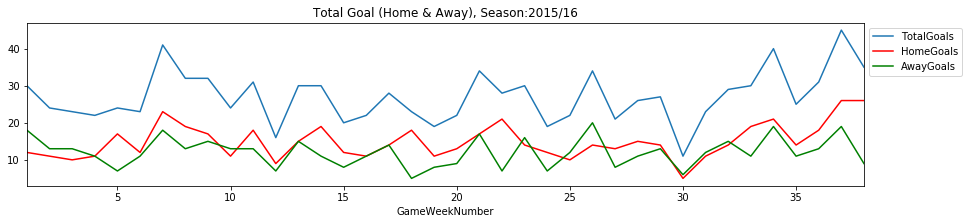

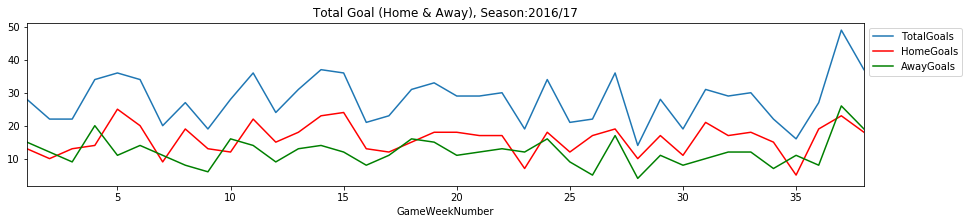

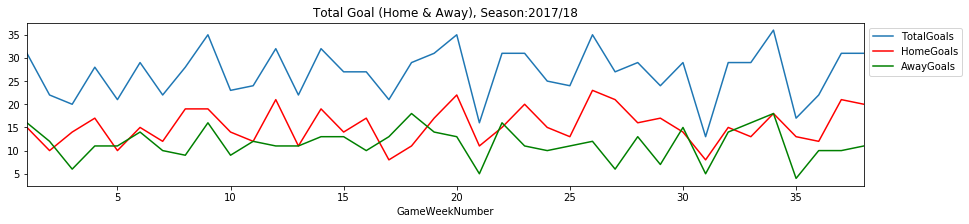

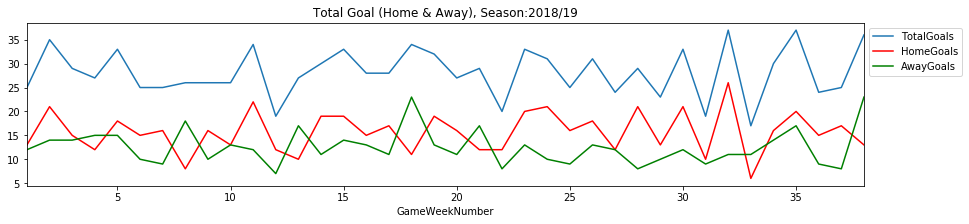

In [93]:
df_var_byweek = df_completeset_converted.loc[:,['seasonlabel','gameweeknum','score_h','score_a','tot_dist_m_h','tot_dist_m_a','possession_pct_h','possession_pct_a','matchoutcome']]
df_var_byweek['score_total'] = df_var_byweek['score_h']+df_var_byweek['score_a']
df_var_byweek['distance_total'] = df_var_byweek['tot_dist_m_h']+df_var_byweek['tot_dist_m_a']
df_goal_byweek_summary=df_var_byweek.groupby(['seasonlabel','gameweeknum'])[['score_h','score_a','score_total']].sum().reset_index()
df_goal_byweek_summary=df_goal_byweek_summary.rename(columns={"seasonlabel": "Season", "gameweeknum": "GameWeekNumber","score_h":"HomeGoals","score_a":"AwayGoals","score_total":"TotalGoals" })
for season in seasons:
    fig= plt.figure(figsize=(15,3))
    ax = plt.gca()
    df_goal_byweek_season = df_goal_byweek_summary[df_goal_byweek_summary['Season']==season]
    df_goal_byweek_season.plot(kind='line',x='GameWeekNumber',y='TotalGoals',ax=ax,title='Total Goal (Home & Away), Season:'+season).legend(bbox_to_anchor=(1,1))
    df_goal_byweek_season.plot(kind='line',x='GameWeekNumber',y='HomeGoals', color='red', ax=ax).legend(bbox_to_anchor=(1,1))
    df_goal_byweek_season.plot(kind='line',x='GameWeekNumber',y='AwayGoals', color='green', ax=ax).legend(bbox_to_anchor=(1,1))
plt.show()


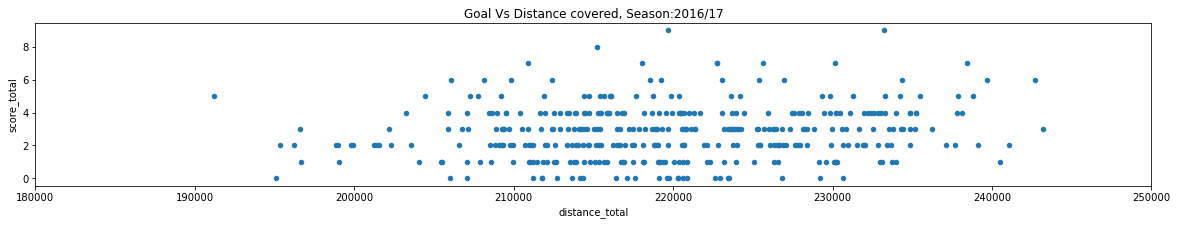

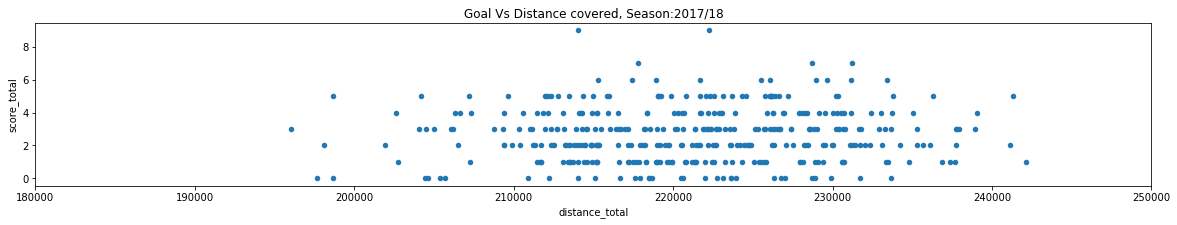

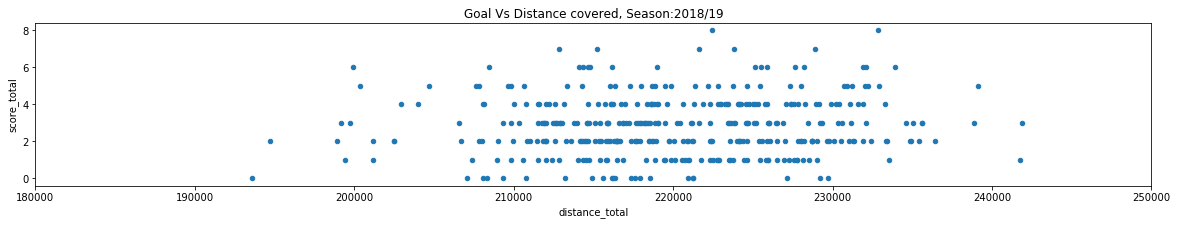

In [84]:
for season in seasons[1:]:
    fig1= plt.figure(figsize=(20,3))
    ax1 = plt.gca()
    #max_goal_week = df_var_byweek['score_total'].max()
    df_d1 = df_var_byweek[df_var_byweek['seasonlabel'] == season ]
    #min_dist = d1['distance_total'].min()
    #plt.scatter(df_var_byweek.distance_total,df_var_byweek.score_total)
    df_d1.plot(x='distance_total',y='score_total',kind='scatter',ax=ax1,title='Goal Vs Distance covered, Season:'+season)
    ax1.set_xlim(180000,250000)
plt.show()

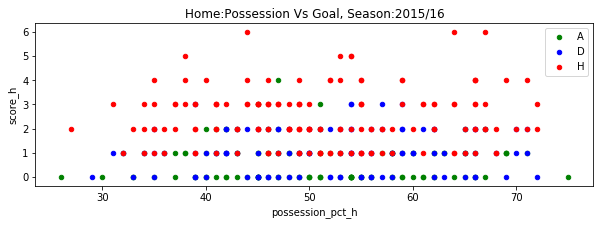

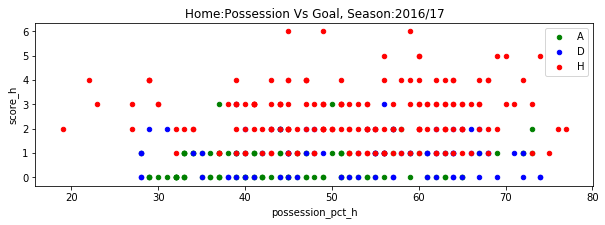

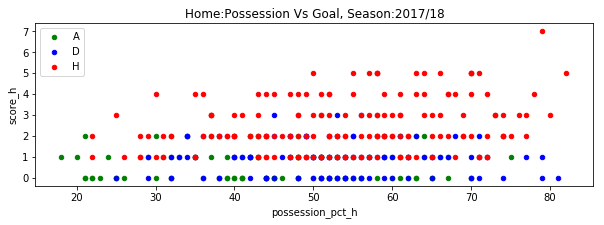

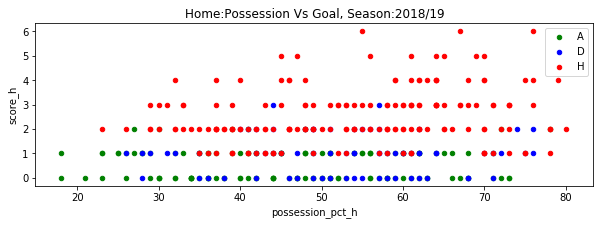

In [167]:
for season in seasons:
    fig1= plt.figure(figsize=(10,3))
    ax1 = plt.gca()
    colors = {'H': 'red','A':'green','D':'blue'}
    #max_goal_week = df_var_byweek['score_total'].max()
    df_d2 = df_var_byweek[df_var_byweek['seasonlabel'] == season ]
    df_d2.head(5)
    #min_dist = d1['distance_total'].min()
    #plt.scatter(df_var_byweek.distance_total,df_var_byweek.score_total)
    for key,group in df_d2.groupby('matchoutcome'):
        group.plot.scatter(x='possession_pct_h',y='score_h',ax=ax1,label=key, c= colors[key],title='Home:Possession Vs Goal, Season:'+season)
        #group.plot.scatter(x='possession_pct_a',y='score_a',ax=ax1,label=key, c= colors[key])
    #ax1.set_xlim(180000,250000)
    #ax1.legend()
plt.show()



In [212]:
df_poss_outcome = df_var_byweek[['seasonlabel','score_h','score_a','possession_pct_h','possession_pct_a','matchoutcome']]
df_poss_outcome2= df_poss_outcome[(df_poss_outcome['matchoutcome']=='H') | (df_poss_outcome['matchoutcome']=='A')]
df_poss_outcome2['PossessionPctWin'] = np.where(df_poss_outcome2['matchoutcome'] == 'H',df_poss_outcome2['possession_pct_h'],df_poss_outcome2['possession_pct_a'])
df_poss_outcome2['PossessionPctLoss'] = np.where(df_poss_outcome2['matchoutcome'] == 'H',df_poss_outcome2['possession_pct_a'],df_poss_outcome2['possession_pct_h'])

C:\Users\deept\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\deept\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


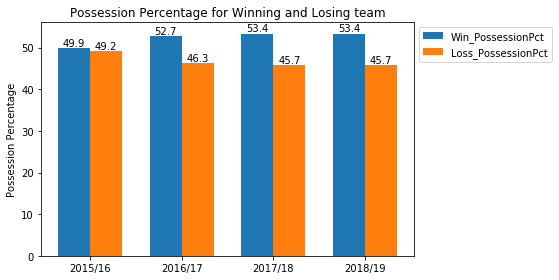

In [214]:
def labelrects (rects):
    for rect in rects:
        height = round(rect.get_height(),1)
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),ha='center', va='bottom')
df_poss_outcome3=df_poss_outcome2.groupby(['seasonlabel'])[['PossessionPctWin','PossessionPctLoss']].mean().reset_index()
df_poss_outcome3.head(5)
Win_PossessionPct = list(df_poss_outcome3['PossessionPctWin'])
Loss_PossessionPct = list(df_poss_outcome3['PossessionPctLoss'])
x = np.arange(len(seasons))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Win_PossessionPct, width, label='Win_PossessionPct')
rects2 = ax.bar(x + width/2, Loss_PossessionPct, width, label='Loss_PossessionPct')
ax.set_ylabel('Possession Percentage')
ax.set_title('Possession Percentage for Winning and Losing team')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
labelrects(rects1)
labelrects(rects2)
ax.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
plt.show()

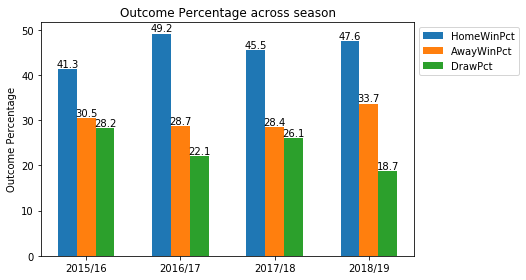

In [306]:
def labelrects (rects):
    for rect in rects:
        height = round(rect.get_height(),1)
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),ha='center', va='bottom')
df_t3= df_var_byweek.groupby(['seasonlabel','matchoutcome'])['gameweeknum'].count().reset_index()
df_t3=df_t3.rename(columns={"gameweeknum": "matchcount"})
df_t3['total'] = df_t3.groupby(['seasonlabel'])['matchcount'].transform('sum')   
df_t3['OutcomePct']  = round((df_t3['matchcount'] / df_t3['total'])*100,1)
df_t3
HomeWinPct = list(df_t3[(df_t3['matchoutcome']=='H')]['OutcomePct'])
AwayWinPct = list(df_t3[(df_t3['matchoutcome']=='A')]['OutcomePct'])
DrawWinPct = list(df_t3[(df_t3['matchoutcome']=='D')]['OutcomePct'])
x = np.arange(len(seasons))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, HomeWinPct, width, label='HomeWinPct')
rects2 = ax.bar(x , AwayWinPct, width, label='AwayWinPct')
rects3 = ax.bar(x + width, DrawWinPct, width, label='DrawPct')
ax.set_ylabel('Outcome Percentage')
ax.set_title('Outcome Percentage across season')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
labelrects(rects1)
labelrects(rects2)
labelrects(rects3)
ax.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
plt.show()

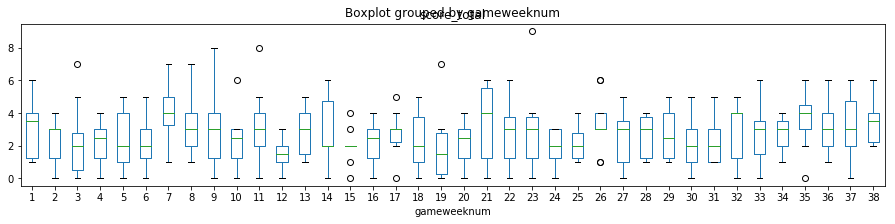

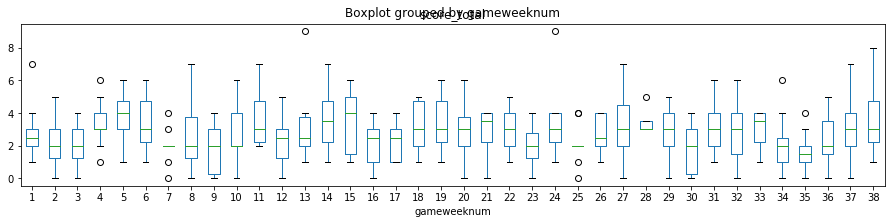

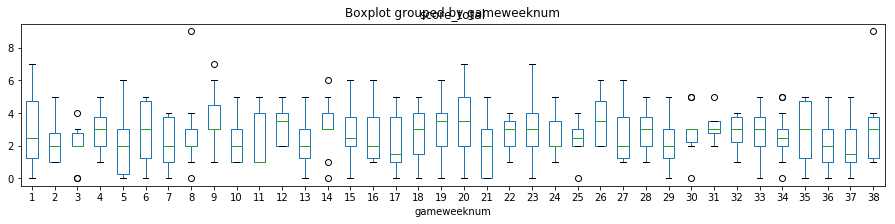

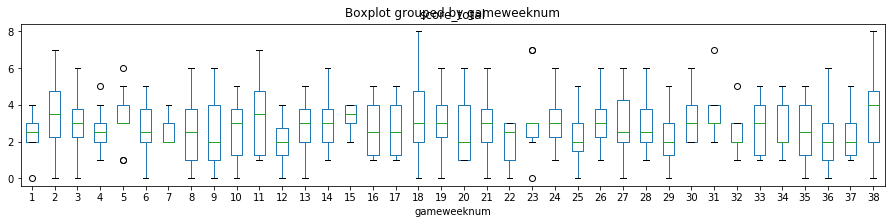

In [278]:
df_var_byweek.head()
for season in seasons:
    df_t4 = df_var_byweek[df_var_byweek['seasonlabel']==season]
    df_t4.boxplot(by ='gameweeknum', column =['score_total'],figsize=(15,3), grid = False) 
    plt.show()

[3, 4, 1, 5, 2, 0, 6, 7]


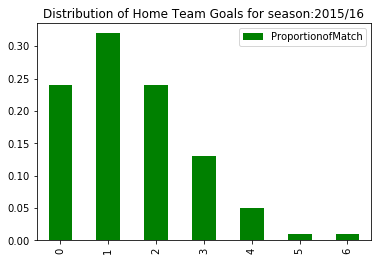

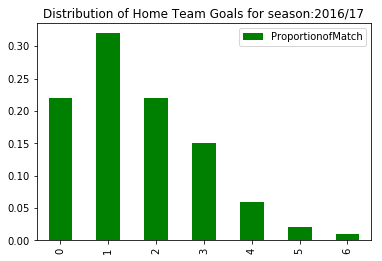

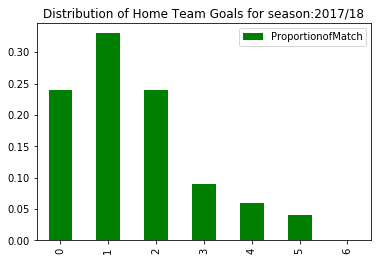

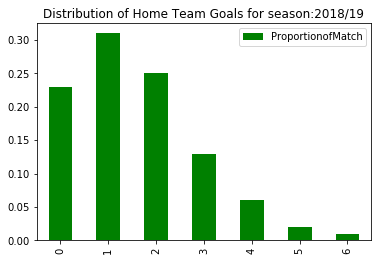

In [302]:
unique_score_home = list(df_var_byweek.score_h.unique())
print(unique_score_home)
df_t5 = df_var_byweek.groupby(['seasonlabel','score_h'])['gameweeknum'].count().reset_index()
df_t5 = df_t5.rename(columns={"gameweeknum":"CountofMatch"})
df_t5['totalMatch'] = df_t5.groupby(['seasonlabel'])['CountofMatch'].transform('sum')  
df_t5['ProportionofMatch'] = round(df_t5['CountofMatch']/df_t5['totalMatch'],2)
df_t5.head(10)
for season in seasons:
    df_t55= df_t5[df_t5['seasonlabel']==season]
    df_t55.plot(x='score_h', y='ProportionofMatch', kind='bar',  use_index=False, color='green',title="Distribution of Home Team Goals for season:"+season).legend(bbox_to_anchor=(1,1))
plt.show()

[3, 4, 1, 5, 2, 0, 6, 7]


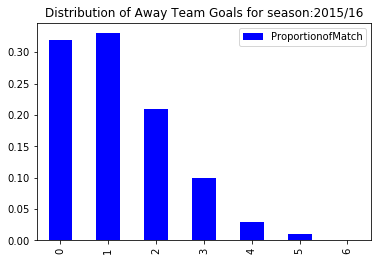

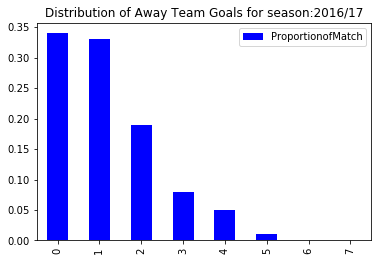

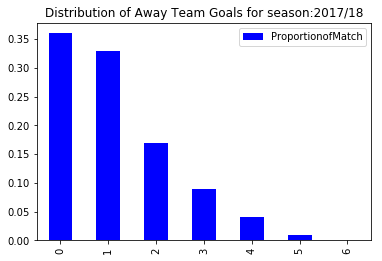

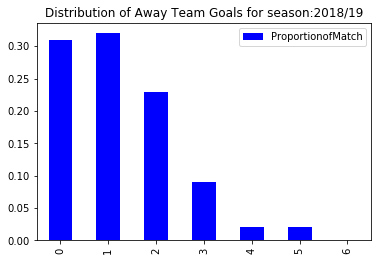

In [305]:
unique_score_home = list(df_var_byweek.score_h.unique())
print(unique_score_home)
df_t6 = df_var_byweek.groupby(['seasonlabel','score_a'])['gameweeknum'].count().reset_index()
df_t6 = df_t6.rename(columns={"gameweeknum":"CountofMatch"})
df_t6['totalMatch'] = df_t6.groupby(['seasonlabel'])['CountofMatch'].transform('sum')  
df_t6['ProportionofMatch'] = round(df_t6['CountofMatch']/df_t6['totalMatch'],2)
df_t6.head(10)
for season in seasons:
    df_t66= df_t6[df_t6['seasonlabel']==season]
    df_t66.plot(x='score_a', y='ProportionofMatch', kind='bar',  use_index=False, color='blue',title="Distribution of Away Team Goals for season:"+season).legend(bbox_to_anchor=(1,1))
plt.show()